In [8]:
import pandas as pd

data = pd.read_csv('smoking_drinking_dataset_Ver01.csv')

"""
    Data: 
        SMK_stat_type_cd [1,2,3] == [never, used to smoke by quit, still smoke]
        DRK_YN [0, 1] == [no, yes]
"""
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [9]:
from pandas.api.types import is_numeric_dtype

# For each column, if the column is categorical, print the count of each data category
for col in data.columns:
    if not is_numeric_dtype(data[col]):
        print(data[col].value_counts())

sex
Male      526415
Female    464931
Name: count, dtype: int64
DRK_YN
N    495858
Y    495488
Name: count, dtype: int64


In [10]:
data.describe(include='all')

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,991346,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,526415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495858
mean,NaN,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,...,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122,NaN
std,NaN,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,...,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507,NaN
min,NaN,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,...,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,NaN
50%,NaN,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,NaN
75%,NaN,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,NaN


In [11]:
# Create subset of data
data = data[['sex', 'age', 'SMK_stat_type_cd', 'DRK_YN', 'weight']]

data = pd.get_dummies(data, columns=['sex'])
data

,age,SMK_stat_type_cd,DRK_YN,weight,sex_Female,sex_Male
0,35,1.0,Y,75,False,True
1,30,3.0,N,80,False,True
2,40,1.0,N,75,False,True
3,50,1.0,N,80,False,True
4,50,1.0,N,60,False,True
...,...,...,...,...,...,...
991341,45,1.0,N,80,False,True
991342,35,1.0,N,75,False,True
991343,40,3.0,Y,50,True,False
991344,25,1.0,N,60,False,True


In [12]:
from sklearn.model_selection import train_test_split

Y = data['DRK_YN']  # We want to predict drinking status
X = data.drop(['DRK_YN'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

Accuracy of Decision Tree classifier on training set: 0.70
Accuracy of Decision Tree classifier on test set: 0.70


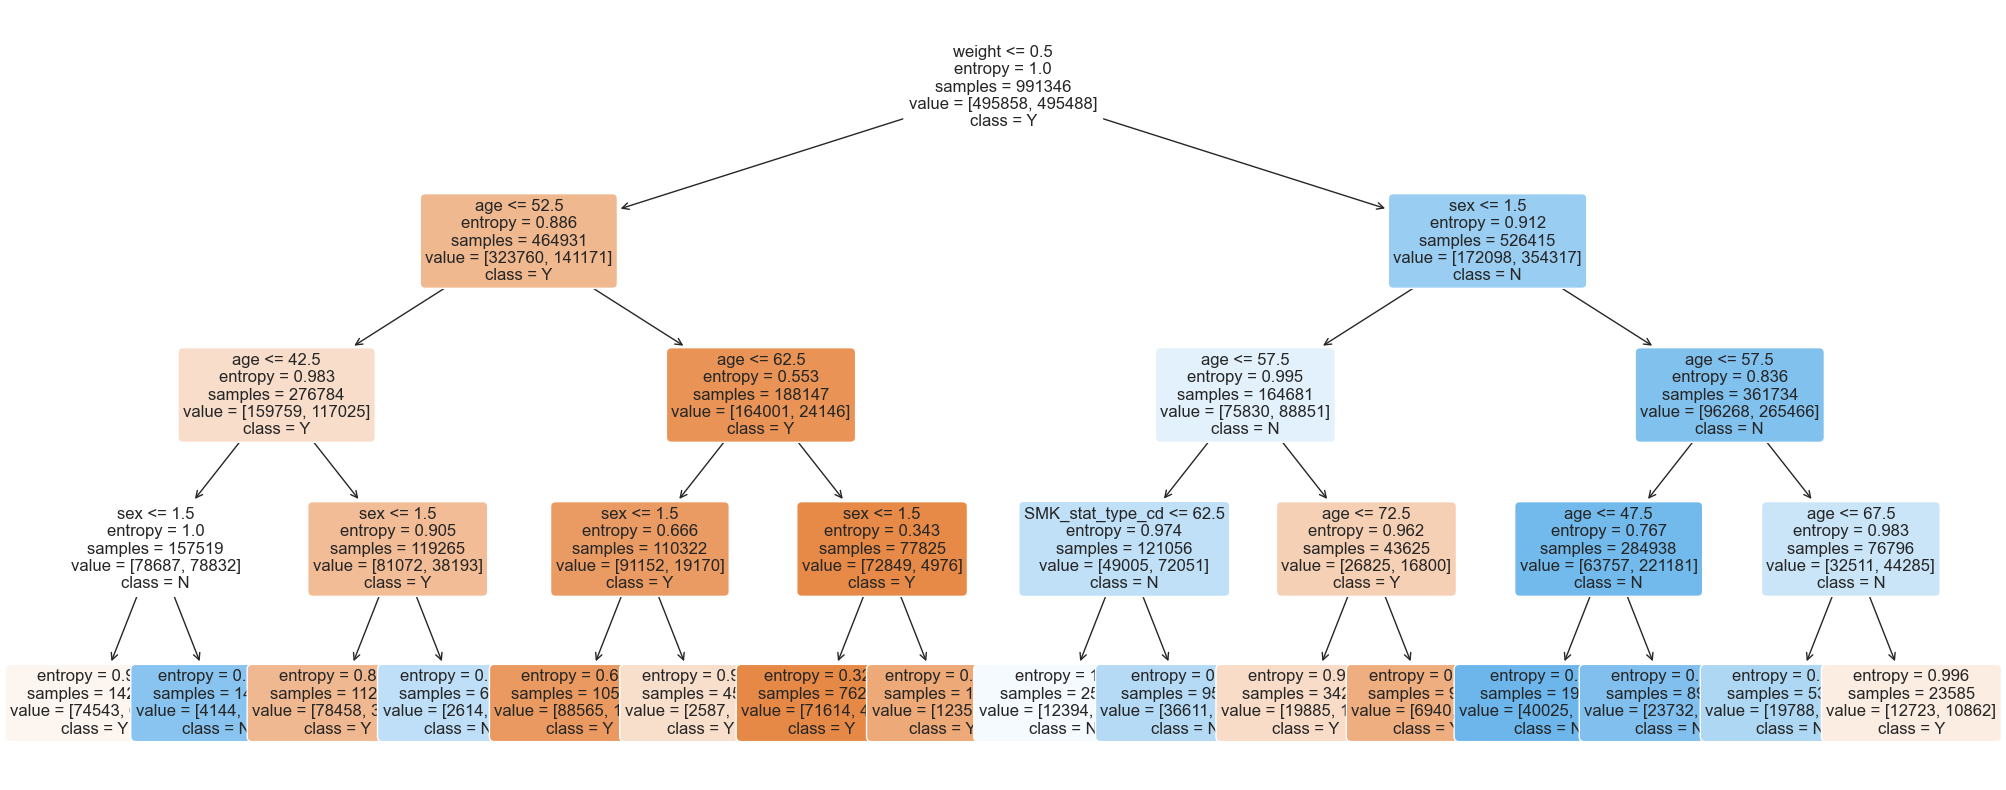

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
# clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf = clf.fit(X, Y)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
      .format(clf.score(x_test, y_test)))

plt.figure(figsize=(25, 10))
tree.plot_tree(clf, feature_names=['age', 'sex', 'SMK_stat_type_cd', 'DRK_YN', 'weight'], class_names=['Y', 'N'],
               filled=True,
               rounded=True, fontsize=12)
plt.show()
test_pred_decision_tree = clf.predict(x_test)

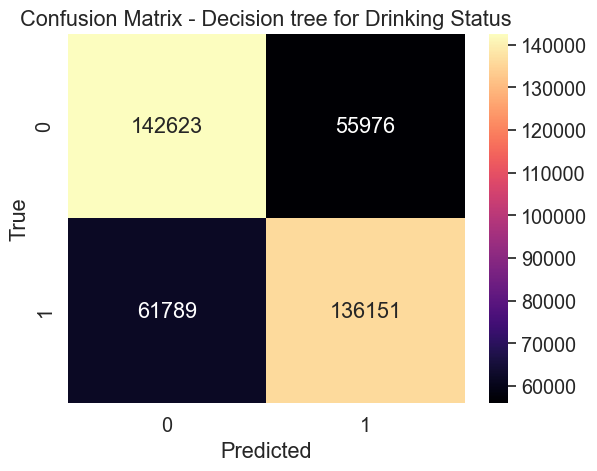

<Figure size 1500x1000 with 0 Axes>

In [14]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)
matrix_df = pd.DataFrame(conf_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title("Confusion Matrix - Decision tree for Drinking Status")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
plt.show()

In [17]:
# Bayesian Classification 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
.format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
.format(gnb.score(x_test, y_test)))

test_pred_gnb = gnb.predict(x_test)

Accuracy of GNB classifier on training set: 0.70
Accuracy of GNB classifier on test set: 0.70
